# Querying the metadataset

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from hpo.optimizers.qt_metadataset import QuickTuneMetaDataset

np.random.seed(1)

#loading metadata might take ~20s
metadataset = QuickTuneMetaDataset(
    aggregate_data=False,
    path="data",
    version="micro",
    load_only_dataset_descriptors=True,
)

In [44]:
#list datasets
datasets = metadataset.get_datasets()
print(len(datasets))
print(datasets[:5])

30
['mtlbm/micro/set1/PNU', 'mtlbm/micro/set0/BRD', 'mtlbm/micro/set1/MD_5_BIS', 'mtlbm/micro/set1/ACT_40', 'mtlbm/micro/set0/PLK']


In [45]:
#set dataset
metadataset.set_dataset_name(datasets[0])

In [46]:
#list number of configurations
candidates = metadataset.get_hyperparameters_candidates()
num_candidates, num_hps = candidates.shape
print("Number of candidates:", num_candidates)
print("Number of hyperparameters:", num_hps)

Number of candidates: 324
Number of hyperparameters: 69


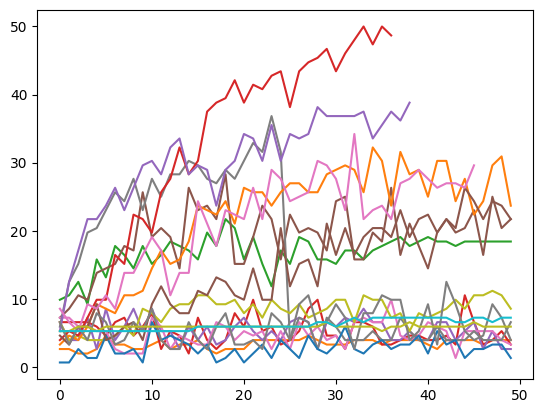

In [47]:
#query the whole curve
num_curves = 20
for i in range(num_curves):
    idx_candidate = np.random.randint(num_candidates)
    curve = metadataset.get_curve(idx_candidate)
    plt.plot(curve)

In [52]:
#query a specific curve for a specific budget
idx_candidate = np.random.randint(num_candidates)
accuracy = metadataset.get_performance(idx_candidate, budget = 10) #budget in epochs
cost = metadataset.get_step_cost(idx_candidate, budget = 10) #cost of executing from epoch 9 to epoch 10
print("Accuracy (%):", accuracy)
print("Cost (s):", cost)

Accuracy (%): 10.526315990247223
Cost (s): 2.0648961067199707
